In [1]:
# Import all necessary libs and inital setup

import cv2
from matplotlib import pyplot as plt
from scipy import ndimage

# variable sift constants
sift = cv2.xfeatures2d.SIFT_create(nfeatures=250, contrastThreshold=0.06)

def show_and_save_image(img, filename):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.savefig(filename)
    plt.title(filename)
    plt.show()

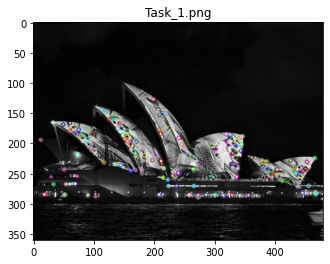

In [2]:
# Task 1

img = cv2.imread("syd_house.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

keypoints = sift.detect(gray_img, None)

display_img = cv2.drawKeypoints(gray_img, keypoints, img)
show_and_save_image(display_img, 'Task_1.png')

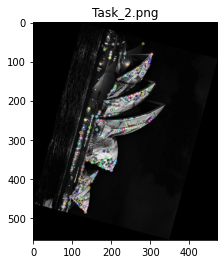

In [3]:
# Task 2

rotated_img = ndimage.rotate(img, 255)
gray_img = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2GRAY)

keypoints = sift.detect(gray_img, None)

display_img = cv2.drawKeypoints(gray_img, keypoints, rotated_img)

# not part of submission
plt.imshow(display_img, cmap='gray', vmin=0, vmax=255)
plt.title('Task_2.png')
plt.show()

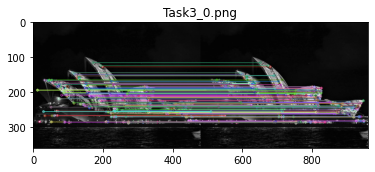

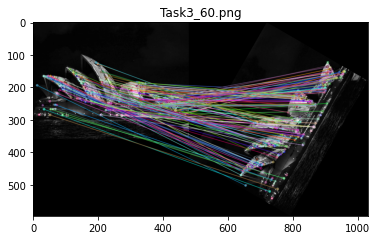

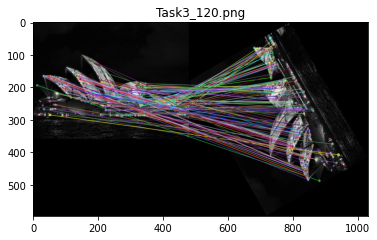

In [4]:
# Task 3

def match_rotated_image(img, rotation):
    rotated_img = ndimage.rotate(img, rotation)

    keypoints, descriptors = sift.detectAndCompute(img, None)
    keypoints_rotated, descriptors_rotated = sift.detectAndCompute(rotated_img, None)

    # match descriptors using knn ratio method
    matcher = cv2.BFMatcher()
    matches = matcher.knnMatch(descriptors, descriptors_rotated, k=2)
    correct_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance: correct_matches += [[m]]

    # draw matches between two images
    return cv2.drawMatchesKnn(img, keypoints, rotated_img, keypoints_rotated, correct_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
      
for rotation in [0, 60, 120]:
    display_img = match_rotated_image(img, rotation)
    show_and_save_image(display_img, f'Task3_{rotation}.png')